In [1]:
import tensorflow as tf
import dataload as dataset
import matplotlib.pyplot as plt
import numpy as np
import random
from keras import layers, models, losses

In [2]:
x_train, x_test, y_train, y_test = dataset.load()

Reading images from  c:\Users\Igor García\Desktop\UPM\4-CUARTO CURSO\PROYECTO DE FIN DE GRADO\ReconocimientoMatriculas\English/Img\
img001-00001.png
img001-00002.png
img001-00003.png
img001-00004.png
img001-00005.png
img001-00006.png
img001-00007.png
img001-00008.png
img001-00009.png
img001-00010.png
img001-00011.png
img001-00012.png
img001-00013.png
img001-00014.png
img001-00015.png
img001-00016.png
img001-00017.png
img001-00018.png
img001-00019.png
img001-00020.png
img001-00021.png
img001-00022.png
img001-00023.png
img001-00024.png
img001-00025.png
img001-00026.png
img001-00027.png
img001-00028.png
img001-00029.png
img001-00030.png
img001-00031.png
img001-00032.png
img001-00033.png
img001-00034.png
img001-00035.png
img001-00036.png
img001-00037.png
img001-00038.png
img001-00039.png
img001-00040.png
img001-00041.png
img001-00042.png
img001-00043.png
img001-00044.png
img001-00045.png
img001-00046.png
img001-00047.png
img001-00048.png
img001-00049.png
img001-00050.png
img002-00001.png
i

In [3]:
#Normalizacion de los datos
x_train = tf.pad(x_train, [[0, 0], [0,0], [0,0], [0,0]])/255
x_test = tf.pad(x_test, [[0, 0], [0,0], [0,0], [0,0]])/255

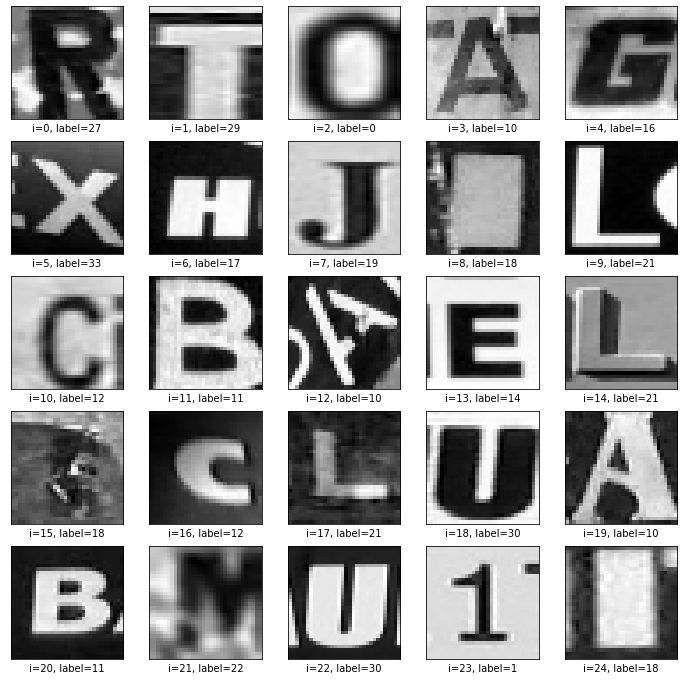

In [4]:
#Escogemos 25 imagenes de entrenamiento aleatorias
plt.figure(figsize=(12, 12))
start_index = 0
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    label = np.argmax(y_train[start_index+i])
    
    plt.xlabel('i={}, label={}'.format(start_index+i, label))
    plt.imshow(x_train[start_index+i], cmap='gray')
plt.show()

In [4]:
#Llevamos las ultimas 2000 imágenes a los datos de validación
x_val = x_train[-2000:,:,:,:] 
y_val = y_train[-2000:] 
x_train = x_train[:-2000,:,:,:] 
y_train = y_train[:-2000]

In [19]:
#Definición de la red
model = models.Sequential()
model.add(layers.Conv2D(6, 5, activation='tanh', input_shape=x_train.shape[1:]))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(16, 5, activation='tanh'))
model.add(layers.MaxPooling2D(2))
model.add(layers.Conv2D(120, 5, activation='tanh'))
model.add(layers.Dropout(0.2))
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))
model.add(layers.Dense(36, activation='softmax'))
model.summary()
model.compile(optimizer='adam', loss=losses.categorical_crossentropy, metrics=['accuracy'])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 1, 1, 120)         48120     
                                                                 
 dropout_2 (Dropout)         (None, 1, 1, 120)        

In [12]:
#Ejecución del entrenamiento
history = model.fit(x_train, y_train, batch_size=64, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
69/69 [==============================] - 1s 11ms/step - loss: 0.4494 - accuracy: 0.8686 - val_loss: 0.9460 - val_accuracy: 0.7770
Epoch 2/100
69/69 [==============================] - 1s 8ms/step - loss: 0.4340 - accuracy: 0.8760 - val_loss: 0.9355 - val_accuracy: 0.7715
Epoch 3/100
69/69 [==============================] - 1s 10ms/step - loss: 0.4156 - accuracy: 0.8813 - val_loss: 0.9407 - val_accuracy: 0.7745
Epoch 4/100
69/69 [==============================] - 1s 9ms/step - loss: 0.4155 - accuracy: 0.8781 - val_loss: 0.9308 - val_accuracy: 0.7745
Epoch 5/100
69/69 [==============================] - 1s 8ms/step - loss: 0.4087 - accuracy: 0.8813 - val_loss: 0.9479 - val_accuracy: 0.7805
Epoch 6/100
69/69 [==============================] - 1s 8ms/step - loss: 0.3909 - accuracy: 0.8835 - val_loss: 0.9702 - val_accuracy: 0.7665
Epoch 7/100
69/69 [==============================] - 1s 8ms/step - loss: 0.3832 - accuracy: 0.8856 - val_loss: 0.9558 - val_accuracy: 0.7740
Epoch 8/100

In [20]:
class_weight = {
    0: 2.0, 1: 2.0, 2: 2.0, 3: 2.0, 4: 2.0, 5: 3.0, 6: 2.0, 7: 2.0, 8: 2.0, 9: 3.0, #0-9 con el doble de peso, dar mas importancia a los numeros
    10: 1.0, 11: 1.0, 12: 1.0, 13: 1.0, 14: 1.0, 15: 1.0, 16: 1.0, 17: 1.0, 18: 1.0, 19: 1.0,
    20: 1.0, 21: 1.0, 22: 1.0, 23: 1.0, 24: 1.0, 25: 1.0, 26: 1.0, 27: 1.0, 28: 1.0, 29: 1.0,
    30: 1.0, 31: 1.0, 32: 1.0, 33: 1.0, 34: 1.0, 35: 1.0}

In [21]:
#Ejecución del entrenamiento con pesos de clasificación
history = model.fit(x_train, y_train, class_weight= class_weight,batch_size=64, epochs=100, validation_data=(x_val, y_val))

Epoch 1/100
69/69 [==============================] - 6s 22ms/step - loss: 3.7902 - accuracy: 0.0740 - val_loss: 3.2857 - val_accuracy: 0.0720
Epoch 2/100
69/69 [==============================] - 1s 11ms/step - loss: 3.7579 - accuracy: 0.0933 - val_loss: 3.2925 - val_accuracy: 0.0720
Epoch 3/100
69/69 [==============================] - 1s 12ms/step - loss: 3.7429 - accuracy: 0.0894 - val_loss: 3.2873 - val_accuracy: 0.1055
Epoch 4/100
69/69 [==============================] - 1s 10ms/step - loss: 3.7397 - accuracy: 0.0910 - val_loss: 3.2862 - val_accuracy: 0.1055
Epoch 5/100
69/69 [==============================] - 1s 10ms/step - loss: 3.7362 - accuracy: 0.0940 - val_loss: 3.2954 - val_accuracy: 0.1055
Epoch 6/100
69/69 [==============================] - 1s 14ms/step - loss: 3.7383 - accuracy: 0.0899 - val_loss: 3.2998 - val_accuracy: 0.1055
Epoch 7/100
69/69 [==============================] - 1s 10ms/step - loss: 3.7374 - accuracy: 0.0915 - val_loss: 3.2874 - val_accuracy: 0.1055
Epoch 

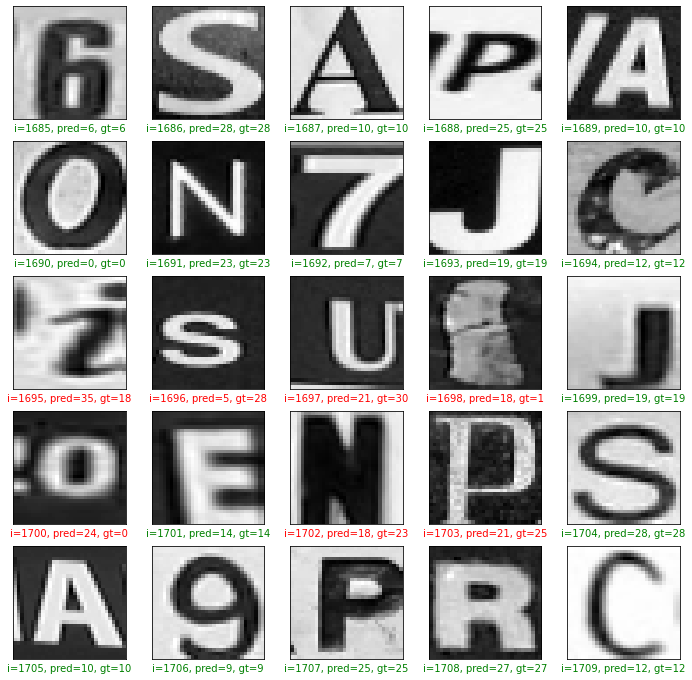

In [22]:
preds = model.predict(x_test)

plt.figure(figsize=(12, 12))
start_index = random.randint(0, 2745)
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    pred = np.argmax(preds[start_index+i])
    gt = np.argmax(y_test[start_index+i])
    
    col = 'g'
    if pred != gt:
        col = 'r'
    
    plt.xlabel('i={}, pred={}, gt={}'.format(start_index+i, pred, gt), color=col)
    plt.imshow(x_test[start_index+i], cmap='gray')
plt.show()

In [12]:
val_loss, val_acc = model.evaluate(x_test, y_test, verbose=2)
print('\nValidation accuracy:', val_acc)
print('\nValidation loss:', val_loss)

86/86 - 0s - loss: 1.3050 - accuracy: 0.7719 - 495ms/epoch - 6ms/step

Validation accuracy: 0.7719489932060242

Validation loss: 1.3049715757369995


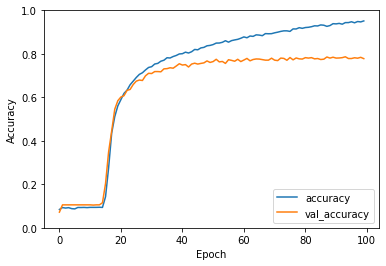

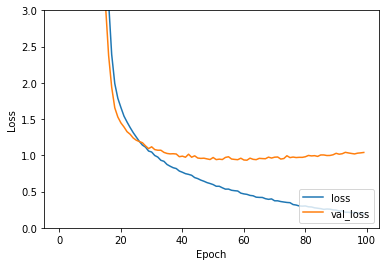

In [9]:
#Mostramos los resultados en un gráfico
plt.figure(0)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.0, 1])
plt.legend(loc='lower right')

plt.figure(1)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [23]:
#Guardar el modelo
model.save('/content/gdrive/My Drive/keras_model/lecturaConPesos')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/keras_model/lecturaConPesos\assets
